# Titanic - Machine Learning from Disaster (Solution)

In this laboratory, you will implement a full machine learning pipeline, from preprocessing to model evaluation. 
The dataset we use is a famous one: [the Titanic dataset](https://www.kaggle.com/competitions/titanic/data) (yes, the big boat that sank...).

The idea is simple: use ML to predict which passengers survived the Titanic shipwreck. The dataset is quite simple to understand but presents some real-world challenges (e.g., missing values). The explanation of the dataset is available at the link above.

## Goals
The goal of this lab is to guide you towards a higher level of autonomy when dealing with ML problems, in particular, classification problems (and in the later part, you will deal with a regression problem). 
This document provides just the skeleton of your program, reminding you of the main steps to be accomplished.
At the end of this lab, you will be able to:
- Work on a jupyter notebook for a ML problem.
- Develop a full Machine Learning pipeline starting from a skeleton.
- Perform data exploration and data preparation
- Train, tune and **properly** evaluate different ML models (decision tree, random forest, etc.)

## 1 Data exploration 

### 1.1 Load the data

In [1]:
# The library jupyter_black is used to format the code in the Jupyter Notebook in a format called "Black"
# By using it, you agree to cede control over minutiae of hand-formatting.
# You will save time and mental energy for more important matters.
# You can make Jupyter auto-format every cell upon execution simply by adding the following lines at the top of the notebook
import jupyter_black

jupyter_black.load()

In [2]:
# Import libraries
import pandas as pd
import numpy as np

In [3]:
# Load the data (this may change depending on the location of the data: download the data from https://www.kaggle.com/competitions/titanic/data)
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

### 1.2 Explore the data

#### 1.2.1 Explore the training set

In [4]:
# Display the first 5 rows of the training set
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Analysis:** The dataset contains all the columns described in the metadata. No feature is missing.
Notes:
- Survived: is a boolean variable. I indicates whether the passenger survived (0 = No, 1 = Yes). **This will be our target variable**.
- We note that there are some missing values. We will need to deal with that.
- Some columns are not useful for our task (e.g., PassengerId, Name, Ticket, Cabin). We will drop them later.

In [5]:
# Display the shape of the training set
train_df.shape

(891, 12)

In [6]:
# Display the information of the training set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Analysis:** The training set contains 891 rows and 12 columns. The columns are of different types: int64, float64 and object. We will need to encode the categorical columns and scale the numerical columns.

In [7]:
# Display the statistics of the training set
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Analysis:** The statistics of the training set show that the numerical columns have different scales. We will need to scale them. For instance, age ranges from 0.42 to 80, while fare ranges from 0 to 512.3292.

In [8]:
# We check if the dataset is balanced
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Analysis:** The dataset is not perfectly balanced. We have 549 passengers that did not survive and 342 that survived. This is important to keep in mind when evaluating the performance of the model. We may need to use other metrics than accuracy to evaluate the model.

In [9]:
# We check if there are any missing values in the training set
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
# Count the missing values in the training set
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Show the percentage of missing values in the training set
train_df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Analysis:** We have missing values in the Age, Cabin and Embarked columns. We will need to deal with them. We may be able to fill the missing values in the Age and Embarked columns, but we will drop the Cabin column as it has too many missing values.

In [12]:
# We display the correlation matrix
# We want to show which features are correlated and their correlation with the target variable "Survived"
# To do that we need to drop the columns that are not useful for our task and encode the categorical columns
train_df_corr = train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Sex", "Embarked"])

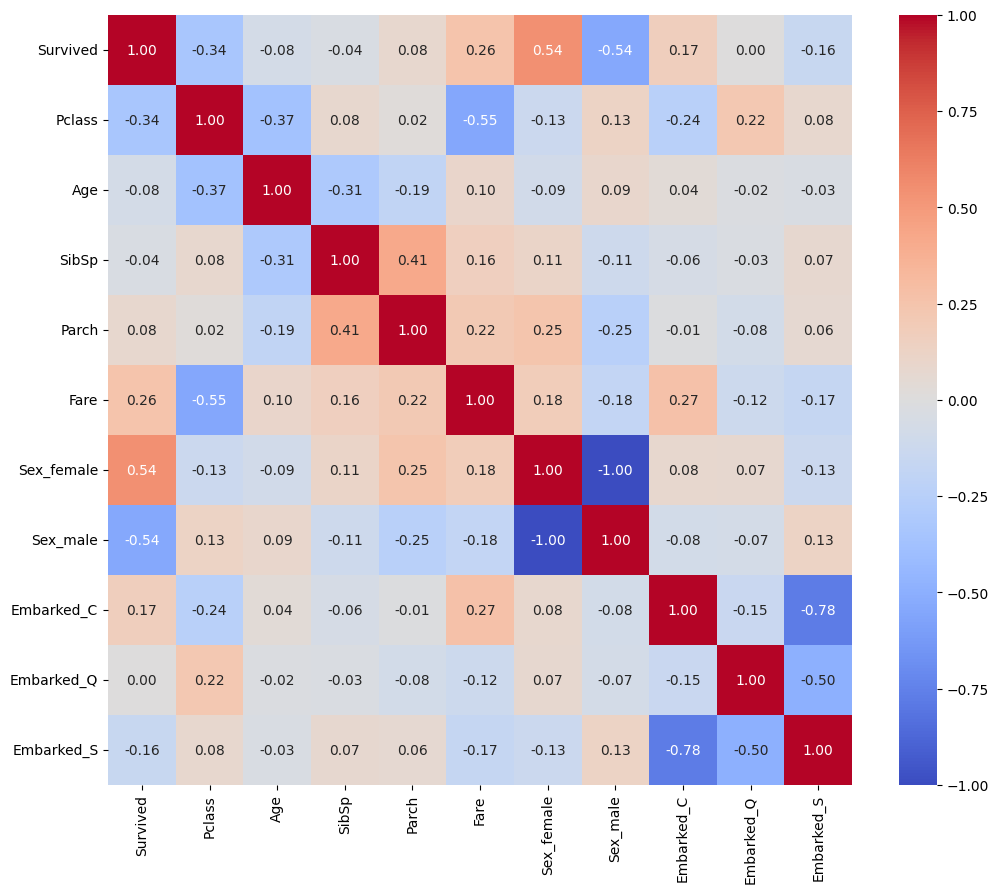

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(train_df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Analysis:** The correlation matrix shows that the features are not highly correlated. The highest correlation is between `Fare` and `Pclass` (-0.55). We can imagine why (higher the class, higher the cost of the tiket). The target variable `Survived` is correlated with `Pclass` (-0.34), `Fare` (0.26) and `Sex` (0.54). We do not see a strong correlation with `age` (-0.08). This does not mean that `age` is not important. It just means that it is not linearly correlated with the target variable. We will need to use a model to understand its importance. 

#### 1.2.2 Explore the test set

In [14]:
# Display the shape of the test set
test_df.shape

(418, 11)

In [15]:
# Display the information of the test set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [16]:
# Display the statistics of the test set
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Analysis:** 
Note 1: We can see that in the training set there are missing values in the Age, Cabin and Embarked columns. We may be able to deal with age and embarked, but we will drop the cabin column as it has too many missing values.
Remember: if we drop a column in the training set, we should also drop it in the test set.

Note 2: We can also see that in the test set there are missing values in the Age, Fare and Cabin columns. We will deal with age and fare, but we will drop the cabin column as it has too many missing values. We CANNOT compute these values from the test set, as we will not have access to it when we will be using our model to make predictions. Therefore, we will use the mean (or other information) of the training set to fill the missing values in the test set.

Note 3: We can also see that the PassengerId, Name and Ticket columns are not useful for our task. We will drop them as well.



### Answers to the questions (Data Exploration)
- **Why is it important to know the type (numerical vs. categorical) of a feature?**

Knowing the type of a feature is important because it determines the type of preprocessing that needs to be done. For example, numerical features need to be scaled, while categorical features need to be encoded. In addition, we cannot do mathematical operations (e.g., correlation) on categorical features, so we need to encode them to be able to use them in a machine learning model. Finally, the type of a feature also determines the type of model that can be used. For example, decision trees can handle both numerical and categorical features, while linear regression can only handle numerical features.

- **Why is it important to understand correlations? Is it good to have features highly correlated with each other? Is it good to have features highly correlated with the target?**

Understanding correlations is important because it helps us understand the relationships between features and the target variable. Highly correlated features can lead to multicollinearity, which can make the model unstable and difficult to interpret. On the other hand, highly correlated features with the target variable can be useful for prediction. For example, if a feature is highly correlated with the target, it can help the model make accurate predictions. However, it is important to note that correlation does not imply causation, so it is important to interpret the results carefully.
 
- **List possible problems related to an unbalanced dataset.**

An unbalanced dataset can lead to biased models that are not able to generalize well to new data. Some possible problems related to an unbalanced dataset include:
  - Biased models: Models trained on unbalanced datasets can be biased towards the majority class, leading to poor performance on the minority class.
  - Poor generalization: Models trained on unbalanced datasets may not generalize well to new data, especially if the distribution of the classes in the test set is different from the training set.
  - Misleading performance metrics: Performance metrics such as accuracy can be misleading on unbalanced datasets, as they do not take into account the class imbalance. For example, a model that predicts the majority class for all instances can have high accuracy but perform poorly on the minority class.
  - Overfitting: Models trained on unbalanced datasets may overfit to the majority class, leading to poor performance on the minority

- **List possible solutions for dealing with an unbalanced dataset.**

There are several techniques that can be used to deal with an unbalanced dataset:
  - Resampling: Resampling techniques such as oversampling the minority class or undersampling the majority class can help balance the dataset.
  - Synthetic data generation: Synthetic data generation techniques such as SMOTE (Synthetic Minority Over-sampling Technique) can be used to generate synthetic samples of the minority class.
  - Cost-sensitive learning: Cost-sensitive learning techniques assign different costs to different classes to account for the class imbalance.
  

- Multiple approaches to deal with missing values exist. The scikit-learn library proposes *mean*, *median*, *most frequent*, and *k-NN* imputation methods.
  - When is one approach more suitable than another?
  - Should you impute missing values in the target (y)?
  - Is imputation always a good idea?

The choice of imputation method depends on the nature of the missing data and the distribution of the feature. For example, mean imputation is suitable for features with a normal distribution, while median imputation is suitable for features with a skewed distribution. Most frequent imputation is suitable for categorical features, while k-NN imputation is suitable for features with complex relationships with other features.
Imputing missing values in the target variable (y) is not recommended, as it can introduce bias into the model. It is better to drop rows with missing values in the target variable.
Imputation is not always a good idea, as it can introduce bias and reduce the variability of the data. It is important to carefully consider the nature of the missing data and the impact of imputation on the model performance before imputing missing values. In our case, imputing the variables `Age` and `Embarked` maybe a good idea (we can at least try), as the missing values are not too many and we can use the mean and the most frequent value, respectively. However, imputing the variable `Cabin` is definitely not a good idea, as there are too many missing values and imputation may introduce bias into the model.

## 2 Data Preparation

### 2.1 Split the data into training and test set

In [42]:
# the dataset is already split... So, skip this step

### 2.2 Fill missing values (if any)

In [ ]:
# Check for any missing values in the training set
train_df.isnull().any()

In [ ]:
# Count the missing values in the training set
train_df.isnull().sum()

In [ ]:
# Check for any missing values in the test set
test_df.isnull().any()

In [ ]:
# Count the missing values in the test set
test_df.isnull().sum()

In [47]:
# Drop useless columns
train_df = train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

We drop 'PassengerId', 'Name', 'Ticket' because they do not contain valuable information.
We drop 'Cabin' because of too many missing values

Remember to:
- get your insights from the training set only (consider as you do not have a test set)
- drop the same columns also in the test set, when available

### Warning:
Pandas behaviour is not the same when you use these two instructions:

In [ ]:
test = train_df["Embarked"]
type(test)  # print the type of the object (in this case, a pandas series)

Or: 

In [ ]:
test = train_df[["Embarked"]]
type(test)  # print the type of the object (in this case, it is a DataFrame)

In the first case, it returns a Series, in the second case a Dataframe. [They are not the same thing](https://www.geeksforgeeks.org/dataframe-vs-series-in-pandas/). Most of the time, you need a dataframe

In [50]:
# Impute missing values in the Age column with KNN imputer (also for the test set, remember to use the mean of the training set)
from sklearn.impute import KNNImputer, SimpleImputer

imputerAgeFare_knn = KNNImputer(n_neighbors=5)
train_df[["Pclass", "SibSp", "Parch", "Age", "Fare"]] = (
    imputerAgeFare_knn.fit_transform(
        train_df[["Pclass", "SibSp", "Parch", "Age", "Fare"]]
    )
)
test_df[["Pclass", "SibSp", "Parch", "Age", "Fare"]] = imputerAgeFare_knn.transform(
    test_df[["Pclass", "SibSp", "Parch", "Age", "Fare"]]
)

# Impute missing values in the Embarked column with the most frequent value (also for the test set, remember to use the most frequent value of the training set)
imputerEmbarked_mode = SimpleImputer(strategy="most_frequent")
train_df[["Embarked"]] = imputerEmbarked_mode.fit_transform(train_df[["Embarked"]])
test_df[["Embarked"]] = imputerEmbarked_mode.transform(test_df[["Embarked"]])

In [ ]:
# Check for any more missing values in the training set
train_df.isnull().any()

In [ ]:
# Check for any more missing values in the test set
test_df.isnull().any()

We should be good to go! No more missing values. We also have all the labels in the training set (Survived column), so, no need to drop any row.

**Question**: 
What is the difference between the scikit learn methods:
- .fit()
- .transform()
- .fit_transform() 

**Solution**:

- .fit():
    - The .fit() method is used to compute the necessary parameters from the training data. This is where the model "learns" from the data.

- .transform():
    - The .transform() method applies the parameters learned from the .fit() method to transform the data into a form that is more suitable for the model12.

- .fit_transform():
    - The .fit_transform() method combines the functionalities of both .fit() and .transform() in one step. It first fits the model to the data and then transforms the data using the fitted model. Using .fit_transform() can be more efficient than calling .fit() and .transform() separately, especially when dealing with large datasets


### 2.3 Separate the features X, from the label y

In [53]:
# Separate the features X, from the label y
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test = test_df.copy()

We drop "Survived" because it is the label. We do not want this information in a training set for random forest. We may need it for methods such as K-NN but the sci-kit learn library takes care of this for us. 

### 2.4 Scale and encode the features

#### 2.4.1 Scale the numerical features

In [54]:
# Scale the numerical features (Age, Fare)
# use .info() to get an idea of the numerical column names
from sklearn.preprocessing import RobustScaler

num_features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

scaler = RobustScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

NOTE: it is arguable whether we should scale the `Pclass`, `SibSp` and `Parch` columns. We will do it here, but you can try to remove them from the list of columns to scale and see whther improves (or not) the performance of the model.

#### 2.4.2 Encode the categorical features

In [55]:
# Encode the categorical feature (one hot encoder)
# (you may want to use .info() to get an idea of the categorical column names)
from sklearn.preprocessing import OneHotEncoder

cat_features = ["Sex", "Embarked"]

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X_train[cat_features])

X_train_cat = encoder.transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

# put this back into a dataframe
X_train_cat = pd.DataFrame(X_train_cat, columns=encoder.get_feature_names_out())
X_test_cat = pd.DataFrame(X_test_cat, columns=encoder.get_feature_names_out())

# drop the original categorical columns
X_train = X_train.drop(cat_features, axis=1)
X_test = X_test.drop(cat_features, axis=1)

# concatenate the encoded categorical columns to the dataframe
X_train = pd.concat([X_train, X_train_cat], axis=1)
X_test = pd.concat([X_test, X_test_cat], axis=1)

In [ ]:
X_train.head()

### 2.5 Encode the labels

In [57]:
# Encode the labels (label encoder)
# we do not need to do this, as the labels are already binary (survived: 0 = No, 1 = Yes)

## 3 Training and evaluation

We structure the code below in a way that we can easily try different classifiers and compare their performance.

In [58]:
# Import libraries (we will use GridSearchCV to find the best hyperparameters for each classifier)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
# Define a function to find the best hyperparameters for a classifier
# Return the model with the best hyperparameters
def find_best_hyperparameters(clf, param_grid, X_train, y_train, scoring="accuracy"):
    # create the grid search object
    grid_search = GridSearchCV(
        clf,
        param_grid,
        cv=5,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1,
        verbose=3,
    )  # use all the cores of the CPU, verbose=3 to see the progress
    # find the best hyperparameters
    grid_search.fit(X_train, y_train)
    # print the best hyperparameters
    print("Best hyperparameters: {}".format(grid_search.best_params_))
    # print the best accuracy score
    print("Best accuracy score: {:.2f}".format(grid_search.best_score_))
    # return the model with the best hyperparameters
    return grid_search.best_estimator_

In [60]:
# train and evaluate the classifier with the best hyperparameters using cross-validation (we do not have the test set labels)
# we want accuracy, precision, recall and f1-score
from sklearn.model_selection import cross_validate


def print_cross_validation_results(clf, X_train, y_train):
    scoring = ["accuracy", "precision", "recall", "f1"]
    scores = cross_validate(
        clf,
        X_train,
        y_train,
        scoring=scoring,
        cv=5,
        return_train_score=True,
        n_jobs=-1,
        verbose=3,
    )  # use all the cores of the CPU, verbose=3 to see the progress
    print(
        "Accuracy score on training set: {:.2f}".format(scores["train_accuracy"].mean())
    )
    print(
        "Precision score on training set: {:.2f}".format(
            scores["train_precision"].mean()
        )
    )
    print("Recall score on training set: {:.2f}".format(scores["train_recall"].mean()))
    print("F1 score on training set: {:.2f}".format(scores["train_f1"].mean()))
    print(
        "Accuracy score on validation set: {:.2f}".format(
            scores["test_accuracy"].mean()
        )
    )
    print(
        "Precision score on validation set: {:.2f}".format(
            scores["test_precision"].mean()
        )
    )
    print("Recall score on validation set: {:.2f}".format(scores["test_recall"].mean()))
    print("F1 score on validation set: {:.2f}".format(scores["test_f1"].mean()))

**NOTE**: it is very important to print scores related to the training set **and** to the validation set. This allows verifying possible overfitting/underfitting conditions.

### 3.1 k-nn classifier

In [ ]:
# Import the k-nn classifier
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to explore
param_grid = {"n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15]}

# Create the classifier
knn_clf = KNeighborsClassifier()

# Find the best hyperparameters
knn_clf = find_best_hyperparameters(knn_clf, param_grid, X_train, y_train)

# Print the cross validation results
print_cross_validation_results(knn_clf, X_train, y_train)

### 3.2 Decision tree classifier

In [ ]:
# Import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to explore
param_grid = {
    "max_depth": [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

# Create the classifier
dt_clf = DecisionTreeClassifier()

# Find the best hyperparameters
dt_clf = find_best_hyperparameters(dt_clf, param_grid, X_train, y_train)

# Print the cross validation results
print_cross_validation_results(dt_clf, X_train, y_train)

### 3.3 Random Forest classifier

In [ ]:
# Import the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to explore (warning: this may take a long time to run)
param_grid = {
    "n_estimators": [10, 100, 500],
    "max_depth": [None, 1, 3, 9],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
}
# param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create the classifier
rf_clf = RandomForestClassifier()

# Find the best hyperparameters
rf_clf = find_best_hyperparameters(rf_clf, param_grid, X_train, y_train)

# Print the cross validation results
print_cross_validation_results(rf_clf, X_train, y_train)

# Rank and print the feature importances with its corresponding feature name
importances = rf_clf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))